<a href="https://colab.research.google.com/github/nvnanava/Yelp_Project/blob/main/Assignment1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Import Needed Packages

In [325]:
!pip install pandas
!pip install scikit-learn
!pip install tensorflow

Import needed packages part 2

In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import random
from typing import List, Tuple, Dict
import warnings
warnings.filterwarnings('ignore')


Import reviews and business data

Note: Reading business file, then reducing it to those businesses that have more than 20 reviews.

In [ ]:
#reviews_df = pd.read_json("yelp_academic_dataset_review.json", lines=True)
temp_df = pd.read_json("Yelp JSON/yelp_dataset/yelp_academic_dataset_business.json", lines=True)
business_df = temp_df[temp_df['review_count'] >= 20]
business_df


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'..."
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150330,GeEveoOaU2YKD7jJtEfA_g,DeVons Jewelers,"13981 S Virginia St, 402A",Reno,NV,89511,39.404552,-119.750986,5.0,34,1,"{'BusinessParking': '{'garage': False, 'street...","Shopping, Watches, Jewelry","{'Monday': '10:0-19:0', 'Tuesday': '10:0-19:0'..."
150331,qQ7FHvkGEMqoPKKXPk4gjA,La Quinta by Wyndham NW Tucson Marana,6020 West Hospitality Rd,Tucson,AZ,85743,32.358587,-111.093308,2.5,67,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Hotels & Travel, Hotels, Event Planning & Serv...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
150334,LJ4GjQ1HL6kqvIPpNUNNaQ,Shanti Yoga and Ayurveda,"1638 Pine St, Fl 1",Philadelphia,PA,19103,39.945966,-75.169666,4.5,39,1,"{'ByAppointmentOnly': 'True', 'GoodForKids': '...","Health & Medical, Yoga, Shopping, Naturopathic...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
150336,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147,39.935982,-75.158665,4.5,35,1,"{'WheelchairAccessible': 'False', 'Restaurants...","Restaurants, Mexican","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."


In [328]:
# Saving using pickle for faster load later
business_df.to_pickle("businessdf.pkl")

In [329]:
# To load in the future....
business_df = pd.read_pickle("businessdf.pkl")

In [330]:
restaurant_df= business_df[business_df["categories"].str.contains("Restaurants", na = False)]

In [331]:
gym_df = business_df[business_df["categories"].str.contains("Fitness", na = False)]

In [332]:
doctor_df = business_df[business_df["categories"].str.contains("Health & Medical", na = False)]

In [333]:
jewel_df = business_df[business_df["categories"].str.contains("Jewelry", na = False)]

In [334]:
hotel_df = business_df[business_df["categories"].str.contains("Hotels", na = False)]

In [335]:
restaurant_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
12,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'Restaura...","American (Traditional), Restaurants, Diners, B...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."
14,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'..."
15,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
19,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150319,8n93L-ilMAsvwUatarykSg,Kitchen Gia,3716 Spruce St,Philadelphia,PA,19104,39.951018,-75.198240,3.0,22,0,"{'RestaurantsGoodForGroups': 'True', 'BikePark...","Coffee & Tea, Food, Sandwiches, American (Trad...","{'Monday': '9:0-19:30', 'Tuesday': '9:0-19:30'..."
150322,2MAQeAqmD8enCT2ZYqUgIQ,The Melting Pot - Nashville,"166 2nd Ave N, Ste A",Nashville,TN,37201,36.163875,-86.776311,4.0,204,0,"{'RestaurantsDelivery': 'False', 'RestaurantsR...","Fondue, Beer, Wine & Spirits, Food, Restaurants","{'Monday': '0:0-0:0', 'Tuesday': '16:0-21:0', ..."
150323,w_4xUt-1AyY2ZwKtnjW0Xg,Bittercreek Alehouse,246 N 8th St,Boise,ID,83702,43.616590,-116.202383,4.5,998,1,"{'BikeParking': 'True', 'Alcohol': 'u'full_bar...","Bars, Gastropubs, Sandwiches, Nightlife, Resta...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
150327,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,83704,43.615401,-116.284689,4.0,33,1,"{'WiFi': ''free'', 'RestaurantsGoodForGroups':...","Cafes, Juice Bars & Smoothies, Coffee & Tea, R...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-17:0', '..."


In [336]:
gym_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
261,I3ZLcrGzj-QN5vFgaJFrAg,Golf Galaxy,470 Swedesford Rd,Berwyn,PA,19312,40.067670,-75.449697,3.0,25,1,"{'GoodForKids': 'True', 'BusinessAcceptsCredit...","Shopping, Fashion, Outdoor Gear, Active Life, ...","{'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'..."
262,Tm3QiAVLJAR2fEJK7APPPQ,City Fitness - Northern Liberties,200 Spring Garden St,Philadelphia,PA,19123,39.960343,-75.141951,3.0,131,1,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Active Life, Fitness & Instruction, Trainers, ...","{'Monday': '0:0-0:0', 'Tuesday': '5:0-1:0', 'W..."
397,HsibLfc2XD7Gh7Hbd1WfJQ,Anytime Fitness,"110 W Main St, Ste 170",Carmel,IN,46032,39.979147,-86.128575,2.5,22,1,"{'BusinessParking': '{'garage': False, 'street...","Active Life, Gyms, Fitness & Instruction, Trai...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
528,kxvOUehCtJAL2nYKkeiR-w,Incrediplex,6002 Sunnyside Rd,Indianapolis,IN,46236,39.866083,-85.975098,4.0,33,0,"{'GoodForKids': 'True', 'BusinessAcceptsCredit...","Specialty Schools, Education, Gyms, Sports Clu...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-22:0', ..."
623,CC7YefPM9zc080JHOKfI1w,Xtreme Adventures,24810 State Rd 54,Lutz,FL,33559,28.185208,-82.406265,2.5,26,0,"{'GoodForKids': 'True', 'BikeParking': 'True',...","Amusement Parks, Arts & Entertainment, Kids Ac...","{'Monday': '12:0-19:0', 'Wednesday': '17:0-21:..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149898,vQHLyvsUCUOpGOsPBDlP9g,Flex Appeal,"1101 Steamboat Pkwy, Ste 350",Reno,NV,89521,39.423649,-119.740235,4.5,37,1,"{'WiFi': 'u'free'', 'BikeParking': 'True', 'Bu...","Health & Medical, Food, Active Life, Chiroprac...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
149992,aZz7sJReopPCV9KWvKSTng,Verticity Indoor Cycling,1008 Russell St,Nashville,TN,37206,36.175770,-86.751410,5.0,21,0,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Cardio Classes, Trainers, Cycling Classes, Act...","{'Monday': '5:45-20:0', 'Tuesday': '5:45-20:0'..."
150072,9vP3RrHfPGqZW6V1QE0i0Q,Club Fitness - Creve Coeur,957 Woodcrest Executive Dr,Creve Coeur,MO,63141,38.674600,-90.451742,2.5,81,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Active Life, Tanning Beds, Tanning, Cardio Cla...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
150334,LJ4GjQ1HL6kqvIPpNUNNaQ,Shanti Yoga and Ayurveda,"1638 Pine St, Fl 1",Philadelphia,PA,19103,39.945966,-75.169666,4.5,39,1,"{'ByAppointmentOnly': 'True', 'GoodForKids': '...","Health & Medical, Yoga, Shopping, Naturopathic...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."


In [337]:
doctor_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
128,P8brGDYVWjeW9GrKixH0yQ,Laser Spine Institute,5332 Avion Park Dr,Tampa,FL,33607,27.958613,-82.532595,3.0,36,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Medical Centers, Doctors, Diagnostic Services,...","{'Monday': '8:0-20:0', 'Tuesday': '8:0-20:0', ..."
137,E_kLUlU60fzoZYAOxbH_3w,Pain Institute of Southern Arizona,"4582 N 1st Ave, Ste 170",Tucson,AZ,85718,32.289183,-110.957230,2.5,43,1,"{'AcceptsInsurance': 'True', 'ByAppointmentOnl...","Pain Management, Doctors, Health & Medical, Os...","{'Monday': '7:0-16:30', 'Tuesday': '7:0-16:30'..."
156,t5tBd4p7BA7hNDitBUXxrw,Boise Therapeutic Massage Center,7153 W Emerald St,Boise,ID,83704,43.611949,-116.271110,4.0,68,1,"{'WheelchairAccessible': 'True', 'BusinessAcce...","Massage, Health & Medical, Medical Spas, Beaut...","{'Monday': '9:0-21:0', 'Tuesday': '9:0-21:0', ..."
281,6bFx8j2KqPfmT0XEUS1RMg,Center City Emergency Dentist,"1429 Walnut St, Fl 6",Philadelphia,PA,19102,39.949734,-75.165436,3.5,120,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Orthodontists, Health & Medical, Oral Surgeons...","{'Monday': '9:0-13:0', 'Tuesday': '9:0-18:0', ..."
356,yooufdsf3eAVq_9RQNSDJA,Mazzoni Center,"1348 Bainbridge St, Fl 2",Philadelphia,PA,19147,39.942627,-75.165083,3.0,46,1,"{'ByAppointmentOnly': 'True', 'AcceptsInsuranc...","Local Services, Community Service/Non-Profit, ...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-19:0', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149957,KoE-tbMBF33yHhuALmIezw,Spavia Nashville,"8135 Sawyer Brown Rd, Ste 701",Nashville,TN,37221,36.081586,-86.947850,4.5,46,1,"{'WiFi': 'u'free'', 'WheelchairAccessible': 'T...","Reflexology, Massage Therapy, Skin Care, Beaut...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-20:0', '..."
150076,GV9PSOhl1X-7pmRMbPif3g,IU Health North Hospital,11700 N Meridian St Ave,Carmel,IN,46032,39.959315,-86.159850,4.0,28,1,"{'AcceptsInsurance': 'True', 'BusinessAcceptsC...","Health & Medical, Hospitals","{'Monday': '8:0-20:0', 'Tuesday': '8:0-20:0', ..."
150173,E36h-bJ20aVz_b3-mQCoDQ,Massage & Bodywork By Kuryn,"4320 West El Prado Blvd, Ste 25",Tampa,FL,33629,27.911418,-82.517345,5.0,39,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Massage Therapy, Beauty & Spas, Massage, Healt...","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
150318,VKbQHHUu_cB7M6jQwA3n-w,Planned Parenthood - FifthStreet Health Center,455 W 5th St,Reno,NV,89503,39.530298,-119.820694,3.5,20,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Obstetricians & Gynecologists, Health & Medica...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-20:0', '..."


In [338]:
jewel_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
101,jiLGdnf42eYftkqfU2ze1w,Saks Fifth Avenue,8701 Keystone Crossing,Indianapolis,IN,46240,39.913836,-86.107907,3.5,29,1,"{'RestaurantsPriceRange2': '4', 'BusinessAccep...","Women's Clothing, Men's Clothing, Accessories,...","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
600,VEbHYioBfoPiIOWntE_DBA,Tienda Ho,1105 State St,Santa Barbara,CA,93101,34.422317,-119.703667,4.5,34,0,"{'RestaurantsPriceRange2': '3', 'BusinessParki...","Shopping, Women's Clothing, Jewelry, Fashion, ...","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
747,8f9Jqi4L69SQZIkU5r66Lw,Lee Read Diamonds,650 E Sonata Ln,Meridian,ID,83642,43.594074,-116.386033,3.5,20,1,"{'BusinessParking': '{'garage': False, 'street...","Jewelry Repair, Local Services, Shopping, Appr...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-17:0', ..."
1001,PmASdGXX3XVokN2q92JIXg,L Priori Jewelry,"1601 Walnut St, Ste 1218",Philadelphia,PA,19102,39.949988,-75.167496,5.0,29,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Shopping, Jewelry","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
1246,w1A_N-pg-netgS_znGJlhg,Barn Attic,324 Harleysville Pike Rte113,Harleysville,PA,19438,40.280749,-75.393467,2.5,20,1,"{'RestaurantsPriceRange2': '3', 'BusinessAccep...","Fashion, Home & Garden, Used, Vintage & Consig...",None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149136,VvaRxOJbjaY9DbJ1FNFY6Q,POPPY - Santa Barbara,911 State St,Santa Barbara,CA,93101,34.420759,-119.701150,3.5,25,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Accessories, Fashion, Shopping, Home Decor, Ho...","{'Monday': '11:0-17:0', 'Tuesday': '11:0-17:0'..."
149739,5gB1VjsYqzDeTnqWjX_7bQ,Harland Watch and Diamond,5043 S McCarran Blvd,Reno,NV,89502,39.478935,-119.784326,4.0,43,1,"{'BusinessAcceptsCreditCards': 'True', 'Busine...","Jewelry, Shopping, Local Services, Watches, Wa...","{'Tuesday': '10:0-17:0', 'Wednesday': '10:0-17..."
149866,7RoarRQWRh9V4JtiQUd_EA,Saks Fifth Avenue,1 Plaza Frontenac Street,St. Louis,MO,63131,38.631179,-90.407398,3.5,31,1,"{'RestaurantsPriceRange2': '3', 'BusinessAccep...","Accessories, Men's Clothing, Shopping, Departm...","{'Monday': '10:0-17:0', 'Tuesday': '12:0-17:0'..."
150106,eXT4nQTSqM79nwXhNw5UPg,Precious Metals Refinery,7069 E Tanque Verde Rd,Tucson,AZ,85715,32.252510,-110.841546,4.5,21,1,"{'BusinessParking': '{'garage': False, 'street...","Gold Buyers, Shopping, Jewelry, Pawn Shops, Wa...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."


In [339]:
hotel_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
55,xM6LoUcnpDpMBzXs_7dXAg,Fairfield Inn & Suites,719 E Baltimore Pike,Kennett Square,PA,19348,39.856248,-75.694610,3.0,37,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Hotels, Hotels & Travel, Event Planning & Serv...",None
65,uczmbBk5O3tYhGue13dCDg,New Orleans Spirit Tours,723 St Peter St,New Orleans,LA,70130,29.958431,-90.065173,4.0,38,1,{'WiFi': 'u'no''},"Hotels & Travel, Tours, Local Flavor","{'Monday': '0:0-0:0', 'Tuesday': '10:0-20:0', ..."
112,sB45WFgysT617bKWP_WJwA,Budweiser Brewery Experience,1200 Lynch St,Saint Louis,MO,63118,38.600197,-90.213538,4.5,605,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Bars, Beer Gardens, Food, Breweries, Nightlife...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-17:0', '..."
155,hUQ9Z7kQeabvhPOAQOVV1A,Rathbone Mansions,1244 Esplanade Ave,New Orleans,LA,70116,29.967055,-90.065828,3.5,67,1,"{'WiFi': 'u'free'', 'BusinessAcceptsCreditCard...","Hotels, Hotels & Travel, Bed & Breakfast, Even...",None
181,ORL4JE6tz3rJxVqkdKfegA,Gaylord Opryland Resort & Convention Center,2800 Opryland Dr,Nashville,TN,37214,36.211592,-86.694319,3.0,1639,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Venues & Event Spaces, Performing Arts, Arts &...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149925,NagkUmgLHFd1s8RTk1tcKw,Old Father Inn,4080 W Ina Rd,Marana,AZ,85653,32.338120,-111.053073,3.0,38,1,"{'Alcohol': 'u'full_bar'', 'RestaurantsPriceRa...","Karaoke, Steakhouses, Hotels, Hotels & Travel,...","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ..."
149956,XGGPXLaa_B2Qc79cq9YPlg,Beach House Inn,320 W Yanonali St,Santa Barbara,CA,93101,34.410388,-119.695894,4.5,96,1,"{'RestaurantsPriceRange2': '2', 'BusinessAccep...","Apartments, Hotels, Hotels & Travel, Home Serv...",None
150035,sfGALNhZEYz4HyrVVRaf3A,Beach House Suites by the Don Cesar,3860 Gulf Blvd,St. Pete Beach,FL,33706,27.716203,-82.739108,3.5,39,1,"{'WiFi': ''free'', 'BusinessAcceptsCreditCards...","Hotels, Event Planning & Services, Hotels & Tr...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
150046,1pBiQhcwaI_kF3urOdnG5A,Hotel Indigo Nashville,1719 W End Ave,Nashville,TN,37203,36.152989,-86.795709,3.0,39,0,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Hotels, Shopping, Hotels & Travel, Venues & Ev...",None


In [340]:
businessidlist = set(restaurant_df["business_id"])
businessidlist

{'S5LnH1njwFBlq77tIkjI1g',
 '3eGo-8XUPqOQk9NPxXz27g',
 '6p_A4JdmP3CfRnbjIgsEJw',
 'mQ4c0MjhvSlmhZrzT__aFQ',
 'IGCOAAkyHLksdnvyWhmqYw',
 '3LSYzek9a1Xho8uPEFe29w',
 '2P-pvj_jo0SxNe6jih6sOA',
 'Yu401DtSmkXpJhgXnQcFrg',
 'u3KAwFjxN9AtwElz16ILnA',
 'UdHM_g-JbjxQvGaHKykKeA',
 'lRkJG5xxHpvoV3mkQhbNhQ',
 'arhZ44NOTAA_nb_tfmKn1Q',
 'QcMIUKZr9s6LFy7jsDvNVw',
 'jYMxtQhB1YP0dfhr9P96ng',
 '7ucIWFoUUYYuW1pGJcA6og',
 'prjS_8VAw65e32UtoCj5AA',
 'dlOTtFJbcyN1m5PR2IDxOg',
 'vC2vhaJmX1RpExoHcPOb_A',
 'RfCH2Dt7AmAxnCp8zrYLsA',
 'xK7Ie1utDh9IW7tQfkLpZA',
 '2VFytje8_davOPXcHFx_ow',
 'm0IftALyhD48DUgfRsngUg',
 'ZVkrLNK2Z6zSeCn4U9A7rg',
 'wfjqxgLSsLtyzswzQBziSw',
 'E_DS3V_JY1caD1FU1ys2bA',
 'dDaBhROPNDCePBVJr3caaA',
 'bzvxt0sP9OMwwks1vLSzKw',
 'O1xeHZr6DdZEezlYRUeL9g',
 'JenLzyNp71P2MpLAFq_G6g',
 'DBtvUjFaT1v-p6vCxY2nTw',
 'QU3cET055Ewld3x_bxEtqw',
 'WtHNaPhVH6q1hKCvcjOc-w',
 'PsDw8g3zKT3LbcH4OEuoyg',
 'BQUyn-NDrIHI1Ke7C6tV2Q',
 'wQPbCVMQ0oAN7EylFG0BTA',
 '0aUlooXPSltR7-s7Wfsa6A',
 '2pWloZENgEOocyU6WtPsnw',
 

In [341]:
gymbusinessidlist = set(gym_df["business_id"])
gymbusinessidlist

{'-24TYSeA5yK8oH7hfJkZ0g',
 '-5uzjjKUA-kt81j605d5Jg',
 '-BvpRtFulI1rUkXEOXX3Tg',
 '-FVjMP72oLEDuiP-8gb2dA',
 '-JgPJ7mh3HAMwSEi6sHrRg',
 '-L6QwGtnjdW2VKnYHuu7lA',
 '-M7S_j79LiunqsLs1siEmQ',
 '-MHTa4ClIg83KKZpFARsSw',
 '-P1KJVrfiVncC3xka4GDoQ',
 '-RcCv4oCeDb49qnBGZgjgg',
 '-SL4pxguo0YQlEcOFZLEGQ',
 '-cDML6su_4Arm5USMTKNOw',
 '-cLmu1wRg6DXCTl_MDo8EA',
 '-cb3fjqcb9CVBi1bUYlyrA',
 '-kX4WpZWN_6Xp2mVsYoKVg',
 '-m2ucc0kb_S1-Y4J149AQw',
 '-r-yjid1guWGijXmAnsCNQ',
 '-rCB_kCW-u84S-CQir-lng',
 '-xV7ESuXJglzA_kdd8a7Mw',
 '-xu5l3Ptfwl2Dt5p6WTXvw',
 '-zGlHyBaxib9p7k18i5TSA',
 '04U01tL9wLxxUrmezl9BKw',
 '064WcuNRDGE_HDDt4BASpQ',
 '08Nop7lJ7oJuOQGGmKdfxg',
 '0A5BEEy08k79R5cVlRvJbA',
 '0LR3WhveQWj9zqCDFjshZA',
 '0MEx9QE4UwII2hkxOtc8CQ',
 '0Oyybjr6b142_t1GbmLLHA',
 '0XvVnDKixo4-BZwCN1Ehkg',
 '0bNbWkKmVxJmJuOZCtG7OQ',
 '0hgivhSXH9OCWRtlKHg6aA',
 '0jUNimaBy2JgkY65zu64lQ',
 '0kFnj6G-EQhRNCvHALK7uw',
 '0kWI_syvtjJMbCLhE75Cqw',
 '0pjv7o97ZoYPWuPRpfHDPw',
 '0pvEqchHi_fkxg2gbzt09A',
 '0y0qPSILVuwmj-hxkJJ0Bg',
 

In [342]:
docbusinessidlist = set(doctor_df["business_id"])
docbusinessidlist

{'sO69TdbqFVPQg1h05aTuBw',
 'GbiTG3-vi5EG_W_8LJKesg',
 'B9f1ATnpL0yCbeeMKA3_KA',
 '06bzHvw_QYKaueSOwl7PkQ',
 'GZMGxGnoLTAPBgxFHgzhFA',
 'ED6-QMvrpP2f0gF66Zw0Tg',
 'Is31v0Wgj2ciUzkJyVO-og',
 '537ZVo0ohKP-HMNUza5inA',
 'vWQSbBPQyXKnF92kD6LDmA',
 'cFRRraIn7zhabgKc0zQ2fw',
 'afWmWtt1VVQbfi2v0Nf1fw',
 'h3elVgNF3LH5MipnN430TA',
 'E2bOMskY3Obpmo4KXkoyoQ',
 'QIzTZoV4QFIgesL0aJV6Mg',
 'MHRgXoxLazONKzscBisTdw',
 'cyQh-4C4tqKr-lVjkB5uIw',
 'aO486QfcCVDeKmmb6EpRnQ',
 'eP0K-8MYBWki11BB9ttTFw',
 'fuUbv4IZV-lsfrMPvex7pA',
 '5V-SlozfNTGizZaRmxIzqg',
 'jJDvC05yT8Xb5R9vmMa69Q',
 'yZ9rwNAOWPw_4za4G7IKYw',
 'QNIH2KWIBmfKWg2zwGLcMw',
 'avNUBfd-ZVCA0OkgEvaVqw',
 '36-KlvsWDFiuXj3oD8-tQA',
 'PVeP5Z_6J0IEd4ZV7SLAcg',
 'voQhWm4aRwxxNslERgU1SA',
 'IsfEWr_DcJ96BZpgX9Pt2Q',
 'oY5LFo6Yxxf32ePna6mEUQ',
 'F6iPTC0Bvg2qiA5xHKBO5Q',
 'nyNTbbgnce9KnInP2pZp4A',
 's9zxw2dcpZetR2CdZqgLtQ',
 'xbWiuu9l_yvwVmDEV0v2IQ',
 'rKm8EyKQRHxidls2Pns_cw',
 '81FARdQoaeNI107y2cXwhg',
 'Xr08bwIBEsaQr83aJKQbNg',
 'kzFbA2nYHn87mGk4QuXkiQ',
 

In [343]:
jewelbusinessidlist = set(jewel_df["business_id"])
jewelbusinessidlist

{'-NfDXOlIoQtzA_V2Xhh4QQ',
 '-jdKfTfO0RiZxagql-Tcfg',
 '-r4K0ZM0cQ-cjLlH3S-LAA',
 '-v9IUORxPkzXAnSqP51rsA',
 '0-Tim4ucmy8bNugnzKXG8g',
 '0pzCUHzYxd69lgKfssaRyQ',
 '14TQ3FXCv8af1mGnRYEEYg',
 '1GSWARDKGoe2FWF1QeFqgA',
 '1Ksx9vG_RP5_TIxPONKqow',
 '1RqfozJoosHAsKZhc5PY7w',
 '1XxEqx1h0xpPLkqiqQn3QA',
 '1gT_8s71LAUkPjuj16sf-g',
 '1k5q8CJDRnyTPEkJyypMVQ',
 '1kRUUIg0EsHQndMfMC2x9g',
 '1l0nJA_oa_qY-AbwQSC8Uw',
 '1uLHetBaLyQheTfnf3t59g',
 '2IZwiQIIxbnjKGhUpbVlFg',
 '2OSMOlOmMVtBLoPN338vsQ',
 '2_K6jq54KRaLJaaVI8spKg',
 '38xDVi7BHRavXn6gCtlNvg',
 '39EG5mbSHIc8VaFb71Qaww',
 '3AuC8nsD7sUBihmcANx9Qw',
 '3SJKN_-whf5G40q183iTJg',
 '3Y4aOouZmRxYBhXP7h8wWw',
 '4H07EUUCT55Zt4TQubKmSA',
 '4R9OYjSy6EsKW-2_34HCTg',
 '4lwesYimP6HXbYGCL4cXdA',
 '50Q2uIgwUqmWGLjn_1HSlg',
 '56p17O_bHVEPBh4m41JAsA',
 '5A3MY4zE1e_L8d8yJZbsCg',
 '5gB1VjsYqzDeTnqWjX_7bQ',
 '5hHkrYVgGlUMDhz54H-YSw',
 '5hMuPN93RsEn-nmOfnC3FQ',
 '68KVeNtjmuDT4M0VDnVP9A',
 '6BKYnozWBMrXouTG8njQgQ',
 '6HDngyLgvaeRmftVmJuJzw',
 '6YPdxqjcNOxmu41Uf4x9RA',
 

In [344]:
hotelbusinessidlist = set(hotel_df["business_id"])
hotelbusinessidlist

{'h0wHeh0hTt6Us4W-1SHQOw',
 'Xd9N9DCpy3GwPKTtS5K77w',
 'TnB88L2wYnBL6X9axvzg2Q',
 'CVoTqTnHntspcgrZZy4-Gg',
 'kHUo6Xbmrhyl_5yOC54lAQ',
 'CjPEJuX_MNDiCDjDTp6vQw',
 'usFKC_KMRYVMiVEfz2lI8g',
 '5LONkt7iDMndF3qjN6ufpw',
 'qUZ6PIkYCAsR8WPiHe16pw',
 'zQee6DF458ap5YbtOkMOOQ',
 '_qmFWIAH9ZATeQpXxdm8rg',
 '5bCsL-Z3QnuBmJQtIt8qyw',
 'CU6W984E28nl0YB16mN08Q',
 'Pn8F3jpGMyG3Om1pDxQzvQ',
 'bdxUoXumIbpfAXL4-QL73A',
 'wmVJ-R-kZmWbD65NyWM46g',
 'ztiJMmnrsUasEKj7kYZA5A',
 'su6eqhafkXNxBDHDAH5_SQ',
 'PIgY0ea8D1XVFEL5GG9O9g',
 'J6ZSgoKCLBDMMzuhM-aYGg',
 'y6iJ3Jwvxyl07Y8bBRdtcg',
 'klU8EyJ8Bp1g_HTIDkER2A',
 'L4Ov4OMP_HQJcezDjWl1Aw',
 '1-rMC2D8oviw1gdUx_RaCA',
 'Kfe3OojfeQK2ovKXROaDhA',
 '-uTSULI-6yd-P-TOReLX9Q',
 'cdZf-iYQRy5D18gTM95aew',
 'NagkUmgLHFd1s8RTk1tcKw',
 'SGBg4PVPKpj-s_1364NlZQ',
 'GeGU9bXWWhbIa41Kfs2DJQ',
 's7GZ95hHqmr9WreRU62iBQ',
 'A2_QKfTuztBJ9JEHd__Aaw',
 '5jY7Bm7ELIptRsVyY9xSTA',
 'rZ2Uygsn6vmnUIAaN_DIzQ',
 '2FA2THDOEJjJHjF5opkd7g',
 'HkHIAQCV_ycyyf_59Zq1eg',
 '5AmxUW0J8UWHpY3vlV9BWA',
 

In [ ]:


#For Restaurants
file_path = "/content/drive/MyDrive/yelp_academic_dataset_review.json"
chunks = pd.read_json(file_path, lines=True, chunksize=100000)
# Save rows to a new df if the review is of a relevant business
# Create a new DF with the same columns as the reviews df
temp1_df = pd.DataFrame(columns=["business_id","name", "address", "city", "state", "postal_code", "latitude", "longitude", "stars", "review_count", "is_open", "attributes", "categories", "hours"])
filtered_rows = []
for chunk in chunks:
    filtered = chunk[chunk["business_id"].isin(businessidlist)]
    filtered_rows.append(filtered)


filtered_reviews_df = pd.concat(filtered_rows, ignore_index=True)
filtered_reviews_df
filtered_reviews_df.to_pickle("filteredreviewsdf.pkl")

In [ ]:


#For Gym
file_path = "/content/drive/MyDrive/yelp_academic_dataset_review.json"
chunks = pd.read_json(file_path, lines=True, chunksize=100000)
# Save rows to a new df if the review is of a relevant business
# Create a new DF with the same columns as the reviews df
temp2_df = pd.DataFrame(columns=["business_id","name", "address", "city", "state", "postal_code", "latitude", "longitude", "stars", "review_count", "is_open", "attributes", "categories", "hours"])
filtered_rows1 = []
for chunk in chunks:
    filtered1 = chunk[chunk["business_id"].isin(gymbusinessidlist)]
    filtered_rows1.append(filtered1)


# Save the new df using pickle, for fast access later
filtered_reviews_df1 = pd.concat(filtered_rows1, ignore_index=True)
filtered_reviews_df1
filtered_reviews_df1.to_pickle("filteredreviewsdf1.pkl")

In [ ]:


#For Doctors
file_path = "/content/drive/MyDrive/yelp_academic_dataset_review.json"
chunks = pd.read_json(file_path, lines=True, chunksize=100000)
# Save rows to a new df if the review is of a relevant business
# Create a new DF with the same columns as the reviews df
temp3_df = pd.DataFrame(columns=["business_id","name", "address", "city", "state", "postal_code", "latitude", "longitude", "stars", "review_count", "is_open", "attributes", "categories", "hours"])
filtered_rows2 = []
for chunk in chunks:
    filtered2 = chunk[chunk["business_id"].isin(docbusinessidlist)]
    filtered_rows2.append(filtered2)


# Save the new df using pickle, for fast access later
filtered_reviews_df2 = pd.concat(filtered_rows2, ignore_index=True)
filtered_reviews_df2
filtered_reviews_df2.to_pickle("filteredreviewsdf2.pkl")

In [ ]:


#For Jewelry Stores
file_path = "/content/drive/MyDrive/yelp_academic_dataset_review.json"
chunks = pd.read_json(file_path, lines=True, chunksize=100000)
# Save rows to a new df if the review is of a relevant business
# Create a new DF with the same columns as the reviews df
temp4_df = pd.DataFrame(columns=["business_id","name", "address", "city", "state", "postal_code", "latitude", "longitude", "stars", "review_count", "is_open", "attributes", "categories", "hours"])
filtered_rows3 = []
for chunk in chunks:
    filtered3 = chunk[chunk["business_id"].isin(jewelbusinessidlist)]
    filtered_rows3.append(filtered3)


# Save the new df using pickle, for fast access later
filtered_reviews_df3 = pd.concat(filtered_rows3, ignore_index=True)
filtered_reviews_df3
filtered_reviews_df3.to_pickle("filteredreviewsdf3.pkl")

In [ ]:


#For Hotels
file_path = "/content/drive/MyDrive/yelp_academic_dataset_review.json"
chunks = pd.read_json(file_path, lines=True, chunksize=100000)
# Save rows to a new df if the review is of a relevant business
# Create a new DF with the same columns as the reviews df
temp5_df = pd.DataFrame(columns=["business_id","name", "address", "city", "state", "postal_code", "latitude", "longitude", "stars", "review_count", "is_open", "attributes", "categories", "hours"])
filtered_rows4 = []
for chunk in chunks:
    filtered4 = chunk[chunk["business_id"].isin(hotelbusinessidlist)]
    filtered_rows4.append(filtered4)


# Save the new df using pickle, for fast access later
filtered_reviews_df4 = pd.concat(filtered_rows4, ignore_index=True)
filtered_reviews_df4
filtered_reviews_df4.to_pickle("filteredreviewsdf4.pkl")

In [350]:
import pandas as pd
filtered_reviews_df = pd.read_pickle("filteredreviewsdf.pkl")

In [ ]:


#For Restaurants
file_path = "/content/drive/MyDrive/yelp_academic_dataset_review.json"
chunks = pd.read_json(file_path, lines=True, chunksize=100000)
# Save rows to a new df if the review is of a relevant business
# Create a new DF with the same columns as the reviews df
temp1_df = pd.DataFrame(columns=["business_id","name", "address", "city", "state", "postal_code", "latitude", "longitude", "stars", "review_count", "is_open", "attributes", "categories", "hours"])
filtered_rows = []
for chunk in chunks:
    filtered = chunk[chunk["business_id"].isin(businessidlist)]
    filtered_rows.append(filtered)


filtered_reviews_df = pd.concat(filtered_rows, ignore_index=True)
filtered_reviews_df
filtered_reviews_df.to_pickle("filteredreviewsdf.pkl")

In [352]:
import pandas as pd
filtered_reviews_df1 = pd.read_pickle("filteredreviewsdf1.pkl")

In [353]:
import pandas as pd
filtered_reviews_df2 = pd.read_pickle("filteredreviewsdf2.pkl")

In [354]:
import pandas as pd
filtered_reviews_df3 = pd.read_pickle("filteredreviewsdf3.pkl")

In [355]:
import pandas as pd
filtered_reviews_df4 = pd.read_pickle("filteredreviewsdf4.pkl")

In [356]:
filtered_reviews_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
2,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
3,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
4,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31
...,...,...,...,...,...,...,...,...,...
4522565,7NgXAuTFiJHYbuepOPwU0w,x1QLCwZGFAjxRRw4EHc3-g,1_BVWDzi5cVqWxNe9bOMMQ,5,1,0,1,Don't misinterpret my 5-star review....I don't...,2016-04-30 01:02:34
4522566,wD5ZWao_vjyT2h4xmGam8Q,7L7GL5Pi2cf8mbm2Dpw4zw,e_E-jq9mwm7wk75k7Yi-Xw,5,1,0,1,It is very rare for a restaurant to be this go...,2022-01-17 22:36:01
4522567,YVX1Wsa4LYxjvFwuHBb_gA,RKPkxOYQlM0BjhM-H6_vAw,X4mouE_cMiwbfyCPZ_K-FA,4,3,0,2,"Good, maybe very good. I went for lunch, so t...",2015-01-23 23:52:03
4522568,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27


In [357]:
filtered_reviews_df1

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
1,r-PjI5sBvNoBekk5mURNww,uzy_KYIZx65cp7Yh8_seeQ,ZuM1vcZ_ObCjCCGweYzItg,5,15,0,2,"I took the beginning class there, and I loved ...",2013-10-24 16:40:47
2,-pBDXBop_8v1dKk-BBpyzQ,YW0CUT7vA7pqn2f6aL8rlg,vPlhhf6CcB5dzQv1sEwlvg,5,1,1,1,Planet fitness gets four stars just because it...,2014-09-25 11:44:08
3,LF5UQBZuqjU5B4kTVSIKGg,FsvBdHsES26G0LB2MQZcUg,_agzW_0F9uSJ7i6EJ9ufeg,5,1,0,1,"Rebecca didn't Doula my birth. BUT, she was o...",2015-01-04 01:42:59
4,QS3gJVX4WAfk0Chd4W3zIw,HzX3oBnPUEImHhsdxCu0Aw,ZGD4WacjO1v4Ath3Qil-Sg,5,2,0,1,We belong to lifetime in another state and wer...,2015-10-23 13:44:28
...,...,...,...,...,...,...,...,...,...
39653,zQXCf-ig90eRFkIfSYC2uw,Q2cW75ZwfVKPpOrVwAtMYg,9vP3RrHfPGqZW6V1QE0i0Q,1,0,0,0,BEWARE when you sign up to look at the process...,2015-11-02 17:29:14
39654,1_ulO0tLglmyYQfuXjPQUg,sRayUe6Y_YSXOK7pKfdlBg,IzLOX3tUTqQFBb9kHdu_wA,3,9,0,2,"Tons of top-roping, lead routes, and space... ...",2011-01-27 16:49:38
39655,mq_C9IbtFrquPLwLl5PwhQ,x5YqLqPA5h_G8lmat5BGzA,sEunc4jrrrXsRcWrDjsa-A,1,2,0,0,Beware- don't come here if you want to actuall...,2019-11-15 19:48:36
39656,E5sXn_qdPX5qRxUEApmiuA,Mc4C7fVY0sEcD-U5eOA2Og,ZNfph3_VzRLTOemk9Tmzaw,3,5,0,1,This gym gets the job done. \n\nUpsides: \nChi...,2016-01-25 21:45:34


In [358]:
filtered_reviews_df2

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,rj0asGlfKjlXH6iEgu-jdw,wA7V8Ijgbv-16rmnwW-hjA,LfYUOclwLs_SPrNAdKMjsw,5,4,0,0,Nice relaxing place to get a massage! Same day...,2013-11-14 04:02:52
1,LF5UQBZuqjU5B4kTVSIKGg,FsvBdHsES26G0LB2MQZcUg,_agzW_0F9uSJ7i6EJ9ufeg,5,1,0,1,"Rebecca didn't Doula my birth. BUT, she was o...",2015-01-04 01:42:59
2,dQ3EU6cevDqHAr_ygy1O8A,CNyXcn0c0V5CFmigqqw-Xg,oY5LFo6Yxxf32ePna6mEUQ,5,1,0,0,"I absolutely love this place!\n\nGreat hours, ...",2014-12-30 17:55:51
3,eBrVkzHhHKZxyVS1SPKbJw,1PJ-RjMqXHeymSkLRzuIdA,nOyphAl0JQ8JrvNi93pclQ,2,3,1,1,So I no longer go here which is a shame becaus...,2014-10-28 13:58:00
4,ydXJhVuaE6r7kN1niSqA1w,iyocBf1XVHvsr3SZMpfSnA,BMMcP9fBunmTyYY6XdtQtw,1,0,0,0,LYING SCAMMERS. BAIT AND SWITCH. Will try and ...,2018-01-10 01:35:47
...,...,...,...,...,...,...,...,...,...
107305,3CPM4NFv23mEA5kgnBzNdg,E2w1VFGN44k_bMHnuLsnUQ,H7DVitiflHl8D9mkRxDGoQ,4,0,0,0,"Been struggling with a terrible tooth, hoping ...",2015-05-13 19:42:47
107306,Q6h57S-h4-ND2slRKUg1wg,VjiqLNphmE322B7rDuNoSQ,e3BJXpNS5pjcdXycdxagJw,1,0,0,0,I only went here for Dr Shah for about 8 years...,2020-03-10 16:58:16
107307,7zN73BqyXsuzW8NuyNHkvQ,WLlNXb9kWLhdEbmmWkZeFQ,k9qFNafEUmNbCb1bky5swA,2,1,0,0,UPDATE: Clayton Med Spa reached out to me 6 we...,2019-09-18 02:20:00
107308,os2N5i_n6qlGSeoNIKXEig,hZSWEjV0JAAQ9nq0k50aNg,jz_2B9gw8Ho18ZJmi-iyRw,4,0,0,0,You can always count on a great massage here! ...,2022-01-08 00:54:17


In [359]:
filtered_reviews_df3

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,hONoNzvKbDWlB2AlAF-6vw,gj2a3Pdr85S476EDcVtr2A,50Q2uIgwUqmWGLjn_1HSlg,5,0,0,0,Replaced a dive watch battery in less than 5 m...,2015-06-08 18:04:32
1,bIFYvAi3D5HdSvOjTI63GQ,A95oGBHdDNsE6vHwiwLufA,Af2UlNzQSiZCapJ6qtwu6g,4,0,0,0,Great store if you like 50's-Midcentury modern...,2012-06-26 13:22:19
2,HrYtx4z77i84rgXgOJ60HA,mcx0aeOgvt4Yul5lrvLPeg,u_S84xiDCRJ3CV204CIYuQ,4,0,0,2,I love going into this place to just browse an...,2018-03-16 02:53:19
3,TAArVUfx2VH90L7eXzK1uA,4mjnkd8oJVCfBKN3i4rB-g,u_S84xiDCRJ3CV204CIYuQ,4,0,0,0,"This is my kind of store! A unique, quirky, a...",2010-08-21 04:26:21
4,KZkwG-a3Dm1hJCQ3JX7dXg,NcxVQhNlw219Grdp0yEP8Q,50Q2uIgwUqmWGLjn_1HSlg,5,1,0,0,My grandmother has been going to this place fo...,2014-06-28 05:39:56
...,...,...,...,...,...,...,...,...,...
17224,NgUrGPW6DMjSQMACEbbvlA,ZWQyRKsDXKfYrP5hmlJvfA,eXT4nQTSqM79nwXhNw5UPg,4,2,0,2,Redeem. \n\nWebster says:\n\n1a : to buy back ...,2021-09-10 15:23:20
17225,sibo0WoPJeEBkZ_6ebBRlQ,1fMCwimeMSVq-XfcmIjIiQ,Gv1viz1bePCzeWDNc4tosA,2,0,1,0,Such mixed feelings about this place. One of m...,2021-08-01 01:31:56
17226,Fab-eUPLMp8-sozD1fribQ,EA-bfqoCUGzvaHUQ35pbMg,7RoarRQWRh9V4JtiQUd_EA,1,9,0,0,It has now been a week since my horrific exper...,2019-04-13 20:44:53
17227,sskFUA-ZkKE123kCOkkzOw,rX25Ai-2nC18LOBStyPs_w,EEtATHOs8ZY6evvbrf4PtA,1,13,0,0,"So like many others on here, I'm a fan of Kris...",2019-07-12 22:13:49


In [360]:
filtered_reviews_df4

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,6AxgBCNX_PNTOxmbRSwcKQ,r3zeYsv1XFBRA4dJpL78cw,gmjsEdUsKpj9Xxu6pdjH0g,5,0,2,0,Loved this tour! I grabbed a groupon and the p...,2015-01-03 23:21:18
1,pHwbdway4yeI-dSSmZA7-Q,qEEk0PuoH1dVa619t8fgpw,PY9GRfzr4nTZeINf346QOw,4,0,0,0,We checked in around 2:30 pm. Check-in was qu...,2017-09-20 16:16:47
2,ra9fNjYUumKp_iaqv-jjDg,l_izt6hn7oTxalU06mSyqg,jTI5Xjk27An8ceJ6VwpXiQ,4,0,0,0,"Comfortable bed, good breakfast, fast internet...",2013-08-15 15:57:09
3,qdzNocGBnh8U-cvE_N8qbA,Fq7d14GDAsGjDoojP_ygOQ,pAgtmlIGqFYaWdBoCUeitw,1,3,0,0,The TV shows are $4.99 and they have commercia...,2012-12-04 02:40:49
4,HuWEnZr7-0HveaqXxyywgg,Eb8LgZArKmW0KgW6lTni-w,YbnJYHNp_fHbI-hcFg48vQ,5,2,0,2,The kayaking tour at the Santa Cruz Island was...,2009-08-03 21:55:27
...,...,...,...,...,...,...,...,...,...
300684,s6xifrpyKVupSUgzTj0M2w,uPwlsNBDEGvWriW1pjt1ww,suFQTjOdHk2LM-t0jV98jA,1,0,0,0,I think this is the worst hotel I have been to...,2019-08-07 21:05:26
300685,dnGhGSnMlhZSqVtWeCpagg,eWybZmo5BZl3cp6v4_L7rg,BON1JqGZyG2D1m1Uc9AP9g,1,0,0,0,I've been a customer for over 30 years. Unfor...,2017-02-22 14:18:53
300686,Y7b6Z6sCZiWFWHz8ARba-g,4dtO8AYcpN1T0oqfyoqqiQ,mkXJKCb8bbaiqzY1MGzosw,2,1,0,0,Have enjoyed this place tremendously the past ...,2016-09-05 00:43:28
300687,_b_SOIkWHsNPRGW4RM3X5w,L_fdAnrH5Pxi4PqF08_ToA,ez4kMLP6OJEIaMbMrrGRdA,5,1,1,1,My sister and I went on the ghost tour with Th...,2018-12-10 16:31:32


Split into training and test

In [361]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers

Baseline Model

In [362]:
#Import relevent packages
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from collections.abc import Sequence
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import shutil
import os


Implement TF-IDF

In [363]:
#combine reviews per business so each business has one large string of their reviews
df_review_per_business = filtered_reviews_df.groupby('business_id')['text'].apply(' '.join).reset_index()
df_review_per_business = df_review_per_business.rename(columns={'text': 'all_text_reviews'})

#merge with business_df to bring in the star rating
merge = pd.merge(df_review_per_business, business_df[['business_id','stars', 'review_count']], on = 'business_id')

#apply TF-IDF on all text reviews
vectorizer = TfidfVectorizer(max_features = 5, min_df = 2, max_df =0.8)
X_text = vectorizer.fit_transform(merge['all_text_reviews'])
tfidf_df = pd.DataFrame(X_text.toarray(), columns=[f'tfidf_{i}' for i in range(X_text.shape[1])])

In [364]:
# 2. Scale the review_count feature to similar range as TF-IDF
scaler = StandardScaler()
review_count_scaled = scaler.fit_transform(merge[['review_count']])

print(f"Original review_count range: {merge['review_count'].min()} to {merge['review_count'].max()}")
print(f"Scaled review_count range: {review_count_scaled.min():.3f} to {review_count_scaled.max():.3f}")

Original review_count range: 20 to 7568
Scaled review_count range: -0.485 to 33.242


In [365]:
# 3. Combine features with proper scaling
X = hstack([X_text, review_count_scaled])

In [366]:
# Add review_count
#X_df = pd.concat([tfidf_df, merge[['review_count']].reset_index(drop=True)], axis=1)
#X = X_df.values  # Convert back to numpy array

In [367]:
y = merge['stars'] #labels AKA business star ratings

Build and Train the Baseline Model

In [368]:
# Build the Model Skeleton (Input layer, 1-2 hidden layers and output layer)
model = keras.Sequential( [
    keras.Input(shape=(X.shape[1],)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(1)
])

In [369]:
#Train/Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [370]:
# Check the shapes to confirm everything matches
print(f"X shape: {X.shape}")
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

X shape: (33941, 6)
x_train shape: (25455, 6)
x_test shape: (8486, 6)


Compile the Model

In [371]:
#Compile Model MSE good for regression,
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = [tf.keras.metrics.RootMeanSquaredError()])

Add Callbacks

In [372]:
#Setup earlyStopping callback with patience so training wont overfill
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto')

#save the  model to baselinemodel
checkpointer = ModelCheckpoint(filepath = 'best_overall_model.keras', verbose = 1, save_best_only = True)

Train/Fit Model

In [373]:
#utilizing the x_train, y_train here reserve 20% of the data for validation
model.fit(x_train, y_train, validation_split = 0.2, callbacks = [monitor, checkpointer], verbose = 2, epochs = 1000)

Epoch 1/1000

Epoch 1: val_loss improved from None to 0.57586, saving model to best_overall_model.keras
637/637 - 2s - 3ms/step - loss: 1.6090 - root_mean_squared_error: 1.2685 - val_loss: 0.5759 - val_root_mean_squared_error: 0.7589
Epoch 2/1000

Epoch 2: val_loss improved from 0.57586 to 0.53170, saving model to best_overall_model.keras
637/637 - 1s - 1ms/step - loss: 0.5212 - root_mean_squared_error: 0.7219 - val_loss: 0.5317 - val_root_mean_squared_error: 0.7292
Epoch 3/1000

Epoch 3: val_loss improved from 0.53170 to 0.52028, saving model to best_overall_model.keras
637/637 - 1s - 1ms/step - loss: 0.4980 - root_mean_squared_error: 0.7057 - val_loss: 0.5203 - val_root_mean_squared_error: 0.7213
Epoch 4/1000

Epoch 4: val_loss improved from 0.52028 to 0.51832, saving model to best_overall_model.keras
637/637 - 1s - 1ms/step - loss: 0.4922 - root_mean_squared_error: 0.7016 - val_loss: 0.5183 - val_root_mean_squared_error: 0.7199
Epoch 5/1000

Epoch 5: val_loss improved from 0.51832 t

In [374]:
# Verify the new model expects 6 features
best_model = load_model("best_overall_model.keras")
print(f"New model input shape: {best_model.input_shape}")  # Should be (None, 6)

New model input shape: (None, 6)


In [375]:
#Evaluate model 1
result_one = model.evaluate(x_test, y_test)
model_one_rmse = round(result_one[1], 4)
print(model_one_rmse)

266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - loss: 0.4980 - root_mean_squared_error: 0.7057
0.7057


In [376]:
#save the vectorizer
import pickle
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [377]:
#use the baseline model to make predictions
predictions= model.predict(x_test).flatten()


266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step


In [378]:
#predictions DataFrame setup
ids = merge['business_id'].values

x_train, x_test, y_train, y_test, ids_train, ids_test = train_test_split(X, y, ids, test_size = 0.25, random_state = 42)

In [379]:
#Build the Dataframe
results = pd.DataFrame({'business_id': ids_test, 'correct_stars': y_test, 'predicted_stars': predictions })

In [380]:
#save to CSV
results.to_csv('results.csv', index=False)

In [381]:
results.head() #test to see if the results outputed correctly

,business_id,correct_stars,predicted_stars
23234,forbtWAsfRrLbumFA7cCZA,4.0,3.915123
10887,JJlePhVjtWL_CieAcdqCRg,3.5,3.508841
7209,CMovGmSWFCjhOBOYiymetg,4.0,3.743579
25585,kAmXP3e66dxu21-5_9sBsw,4.0,3.774743
13438,ODDbQCvJBFwLDimkT9KoYA,4.0,3.581054


In [382]:
!ls -lh #confirm file is in directory


'ls' is not recognized as an internal or external command,
operable program or batch file.


**HYPERPARAMETER SWEEPS**

In [383]:
#Results Table
results = pd.DataFrame(columns=["Model", "Activation", "Optimizer", "Layers", "Test_RMSE"])


In [384]:
#Build Model 2
model = keras.Sequential( [
    keras.Input(shape=(X.shape[1],)),
    keras.layers.Dense(128, activation = 'sigmoid'),
    keras.layers.Dense(1)
])

In [385]:
#Compile the model
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [386]:
#Fit
model.fit(x_train, y_train, validation_split = 0.2, callbacks = [monitor, checkpointer], verbose = 2, epochs = 1000)

Epoch 1/1000

Epoch 1: val_loss did not improve from 0.51090
637/637 - 2s - 2ms/step - loss: 0.9733 - root_mean_squared_error: 0.9866 - val_loss: 0.5481 - val_root_mean_squared_error: 0.7403
Epoch 2/1000

Epoch 2: val_loss did not improve from 0.51090
637/637 - 1s - 1ms/step - loss: 0.5155 - root_mean_squared_error: 0.7180 - val_loss: 0.5322 - val_root_mean_squared_error: 0.7295
Epoch 3/1000

Epoch 3: val_loss did not improve from 0.51090
637/637 - 1s - 1ms/step - loss: 0.5137 - root_mean_squared_error: 0.7167 - val_loss: 0.5299 - val_root_mean_squared_error: 0.7280
Epoch 4/1000

Epoch 4: val_loss did not improve from 0.51090
637/637 - 1s - 1ms/step - loss: 0.5122 - root_mean_squared_error: 0.7157 - val_loss: 0.5305 - val_root_mean_squared_error: 0.7283
Epoch 5/1000

Epoch 5: val_loss did not improve from 0.51090
637/637 - 1s - 2ms/step - loss: 0.5104 - root_mean_squared_error: 0.7144 - val_loss: 0.5297 - val_root_mean_squared_error: 0.7278
Epoch 5: early stopping


In [387]:
#Evaluate model
result_two = model.evaluate(x_test, y_test)
model_two_rmse = round(result_two[1], 4)
print(model_two_rmse)

266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 0.5103 - root_mean_squared_error: 0.7144
0.7144


In [388]:
#Save model2
checkpointer = ModelCheckpoint(filepath="best_overall_model.keras", save_best_only=True)

In [389]:
#Append results
loss, rmse = model.evaluate(x_test, y_test, verbose=0)

In [390]:
#Add Baseline behavior
results = pd.concat([results,pd.DataFrame([{"Model": "Model 1","Activation": "relu","Optimizer": "adam","Layers": "[128]","Test_RMSE": model_one_rmse
    }])
], ignore_index=True)


In [391]:
results = pd.concat([results, pd.DataFrame([{"Model": "Model 2", "Activation": "sigmoid", "Optimizer": "adam", "Layers": "[128]", "Test_RMSE": model_two_rmse
    }]) 
], ignore_index=True)

In [392]:
print(results)

     Model Activation Optimizer Layers  Test_RMSE
0  Model 1       relu      adam  [128]     0.7057
1  Model 2    sigmoid      adam  [128]     0.7144


In [393]:
#Build Model3
model = keras.Sequential( [
    keras.Input(shape=(X.shape[1],)),
    keras.layers.Dense(64, activation = 'tanh'),
    keras.layers.Dense(1)
])

In [394]:
#Compile the model
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [395]:
#Fit
model.fit(x_train, y_train, validation_split = 0.2, callbacks = [monitor, checkpointer], verbose = 2, epochs = 1000)

Epoch 1/1000
637/637 - 1s - 2ms/step - loss: 1.5742 - root_mean_squared_error: 1.2547 - val_loss: 0.6533 - val_root_mean_squared_error: 0.8083
Epoch 2/1000
637/637 - 1s - 1ms/step - loss: 0.5643 - root_mean_squared_error: 0.7512 - val_loss: 0.5348 - val_root_mean_squared_error: 0.7313
Epoch 3/1000
637/637 - 1s - 1ms/step - loss: 0.5081 - root_mean_squared_error: 0.7128 - val_loss: 0.5267 - val_root_mean_squared_error: 0.7257
Epoch 4/1000
637/637 - 1s - 1ms/step - loss: 0.5055 - root_mean_squared_error: 0.7110 - val_loss: 0.5245 - val_root_mean_squared_error: 0.7242
Epoch 5/1000
637/637 - 1s - 1ms/step - loss: 0.5041 - root_mean_squared_error: 0.7100 - val_loss: 0.5232 - val_root_mean_squared_error: 0.7233
Epoch 5: early stopping


In [396]:
#Evaluate model 3
result_three = model.evaluate(x_test, y_test)
model_three_rmse = round(result_three[1], 4)
print(model_three_rmse)

266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - loss: 0.5043 - root_mean_squared_error: 0.7102
0.7102


In [397]:
#Save model3
checkpointer = ModelCheckpoint(filepath="best_overall_model.keras", save_best_only=True)

In [398]:
#Append results
loss, rmse = model.evaluate(x_test, y_test, verbose=0)

In [399]:
results = pd.concat([results, pd.DataFrame({"Model": "Model 3", "Activation": "tanh", "Optimizer": "adam", "Layers": "[64]", "Test_RMSE": model_three_rmse}, index=[0])], ignore_index=True)

In [400]:
#Build Model4
model = keras.Sequential( [
    keras.Input(shape=(X.shape[1],)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(1)
])

In [401]:
#Compile the model
model.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [402]:
#Fit
model.fit(x_train, y_train, validation_split = 0.2, callbacks = [monitor, checkpointer], verbose = 2, epochs = 1000)

Epoch 1/1000
637/637 - 1s - 2ms/step - loss: 0.7102 - root_mean_squared_error: 0.8427 - val_loss: 0.5408 - val_root_mean_squared_error: 0.7354
Epoch 2/1000
637/637 - 1s - 1ms/step - loss: 0.5133 - root_mean_squared_error: 0.7164 - val_loss: 0.5309 - val_root_mean_squared_error: 0.7286
Epoch 3/1000
637/637 - 1s - 1ms/step - loss: 0.5023 - root_mean_squared_error: 0.7087 - val_loss: 0.5257 - val_root_mean_squared_error: 0.7251
Epoch 4/1000
637/637 - 1s - 1ms/step - loss: 0.4979 - root_mean_squared_error: 0.7056 - val_loss: 0.5183 - val_root_mean_squared_error: 0.7199
Epoch 5/1000
637/637 - 1s - 1ms/step - loss: 0.4962 - root_mean_squared_error: 0.7044 - val_loss: 0.5196 - val_root_mean_squared_error: 0.7208
Epoch 5: early stopping


In [403]:
#Evaluate model 4
result_four = model.evaluate(x_test, y_test)
model_four_rmse = round(result_four[1], 4)
print(model_four_rmse)

266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - loss: 0.5017 - root_mean_squared_error: 0.7083
0.7083


In [404]:
#Save model4
checkpointer = ModelCheckpoint(filepath="best_overall_model.keras", save_best_only=True)

In [405]:
#Append results
loss, rmse = model.evaluate(x_test, y_test, verbose=0)

In [406]:
results = pd.concat([results, pd.DataFrame({"Model": "Model 4", "Activation": "relu", "Optimizer": "sgd", "Layers": "[128]", "Test_RMSE": model_four_rmse}, index=[0])], ignore_index=True)

In [407]:
results.to_csv("hyperparam_results.csv", index=False)

In [408]:
results.head()

,Model,Activation,Optimizer,Layers,Test_RMSE
0,Model 1,relu,adam,[128],0.7057
1,Model 2,sigmoid,adam,[128],0.7144
2,Model 3,tanh,adam,[64],0.7102
3,Model 4,relu,sgd,[128],0.7083


Based on the hyperparam data chart, Model 3 is the best model due to the RMSE score being the lowest, indicating that it predicted Yelp Ratings a little more accurate then others

Collect Model Data

In [409]:
print(f"x_test shape: {x_test.shape}")

# Load model and check its expected input shape
best_model = load_model("best_overall_model.keras")
# Check what the saved model expects
print(f"Saved model input shape: {best_model.input_shape}")
print(f"Your x_test shape: {x_test.shape}")

x_test shape: (8486, 6)
Saved model input shape: (None, 6)
Your x_test shape: (8486, 6)


In [410]:
# Load the best saved model
from tensorflow.keras.models import load_model
best_model = load_model("best_overall_model.keras")

# Use the BEST model for predictions
predictions = best_model.predict(x_test).flatten()
actuals = y_test.values

266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


Load Relevant Business Data For Evaluation

In [411]:
"""
Load business data and predictions for evaluation
        
Parameters:
-----------
business_data : pd.DataFrame
    DataFrame containing business information (must have 'business_name' column)
predictions : np.array
    Model predictions for business ratings
actuals : np.array
    Actual business ratings
"""
business_data = business_df.copy()
predictions_data = np.array(predictions)
actuals_data = np.array(actuals)

n_predictions = len(predictions_data)
business_data = business_df.head(n_predictions).copy()
        
# Combine data for easier manipulation
business_data['predicted_rating'] = predictions_data
business_data['actual_rating'] = actuals_data

Calculate Root Mean Square Error (RMSE)

In [412]:
"""
Calculate Root Mean Square Error
        
Parameters:
-----------
predictions : np.array, optional
    Model predictions (uses instance data if None)
actuals : np.array, optional
    Actual values (uses instance data if None)
            
Returns:
--------
float : RMSE value
"""
preds = predictions if predictions is not None else predictions_data
acts = actuals if actuals is not None else actuals_data
        
if preds is None or acts is None:
    raise ValueError("No predictions or actuals provided")
            
rmse = np.sqrt(mean_squared_error(acts, preds))

print(f"RMSE Test: {rmse:.4f}")

RMSE Test: 0.7072


Random Business Test

In [413]:
"""
Randomly select businesses and display their predictions vs actuals
        
Parameters:
-----------
n_businesses : int
    Number of businesses to showcase
seed : int, optional
    Random seed for reproducibility
            
Returns:
--------
pd.DataFrame : Formatted table of selected businesses
"""
n_businesses = 5
seed = None

if business_data is None:
    raise ValueError("No business data loaded. Call load_data() first.")
            
if seed is not None:
    random.seed(seed)
    np.random.seed(seed)
        
valid_data = business_data.dropna(subset=['predicted_rating', 'actual_rating'])
    
if len(valid_data) == 0:
    raise ValueError("No valid business data with both predictions and actuals found.")
    
# Randomly select businesses
sample_businesses = business_data.sample(n=min(n_businesses, len(business_data)))
        
# Create formatted display table
showcase_data = []
for idx, business in sample_businesses.iterrows():
    business_name = str(business['name'])
    if len(business_name) > 35:
        business_name = business_name[:32] + "..."
            
    business_info = {
        'Business Name': business_name,
        'City': business['city'],
        'State': business['state'],
        'Actual Rating': f"{business['actual_rating']:.2f}",
        'Predicted Rating': f"{business['predicted_rating']:.2f}",
        'Difference': f"{business['predicted_rating'] - business['actual_rating']:+.2f}",
        'Reviews': int(business['review_count']) if pd.notna(business['review_count']) else 0
    }
    showcase_data.append(business_info)
        
showcase_df = pd.DataFrame(showcase_data)
print(showcase_df.to_string(index=False))

                      Business Name         City State Actual Rating Predicted Rating Difference  Reviews
                   Sunrise Electric  Palm Harbor    FL          3.50             3.76      +0.26       20
United Van Lines Movers -  Saint...    St. Louis    MO          4.00             3.34      -0.66      167
                       Sunrise Cafe       Tucson    AZ          2.00             3.37      +1.37       62
           Isaac's Moving & Storage Philadelphia    PA          4.50             3.47      -1.03       20
           Sarah's Bagel Cafe Idaho        Boise    ID          3.50             3.62      +0.12       21


Full Model Evaulation

In [414]:
"""
Comprehensive model evaluation
        
Parameters:
-----------
detailed_output : bool
    Whether to print detailed results
            
Returns:
--------
Dict : Dictionary containing evaluation metrics
"""
if predictions_data is None or actuals_data is None:
    raise ValueError("No data loaded. Call load_data() first.")
        
# Calculate basic metrics
preds = predictions if predictions is not None else predictions_data
acts = actuals if actuals is not None else actuals_data
        
if preds is None or acts is None:
    raise ValueError("No predictions or actuals provided")
            
rmse = np.sqrt(mean_squared_error(acts, preds))
print(f"RMSE Test: {rmse:.4f}")

detailed_output = True

mae = np.mean(np.abs(predictions_data - actuals_data))
correlation = np.corrcoef(predictions_data, actuals_data)[0, 1]
        
# Calculate prediction statistics
pred_stats = {
    'mean': np.mean(predictions_data),
    'std': np.std(predictions_data),
    'min': np.min(predictions_data),
    'max': np.max(predictions_data)
}
        
actual_stats = {
    'mean': np.mean(actuals_data),
    'std': np.std(actuals_data),
    'min': np.min(actuals_data),
    'max': np.max(actuals_data)
}
        
results = {
    'rmse': rmse,
    'mae': mae,
    'correlation': correlation,
    'prediction_stats': pred_stats,
    'actual_stats': actual_stats,
    'n_samples': len(predictions_data)
}
        
if detailed_output:
    print("="*50)
    print("MODEL EVALUATION RESULTS")
    print("="*50)
    print(f"Number of samples: {results['n_samples']}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"Correlation: {correlation:.4f}")
    print("\nPrediction Statistics:")
    print(f"  Mean: {pred_stats['mean']:.4f}")
    print(f"  Std:  {pred_stats['std']:.4f}")
    print(f"  Range: [{pred_stats['min']:.4f}, {pred_stats['max']:.4f}]")
    print("\nActual Statistics:")
    print(f"  Mean: {actual_stats['mean']:.4f}")
    print(f"  Std:  {actual_stats['std']:.4f}")
    print(f"  Range: [{actual_stats['min']:.4f}, {actual_stats['max']:.4f}]")
    print("="*50)

RMSE Test: 0.7072
MODEL EVALUATION RESULTS
Number of samples: 8486
RMSE: 0.7072
MAE: 0.5549
Correlation: 0.2907

Prediction Statistics:
  Mean: 3.5986
  Std:  0.2189
  Range: [3.2186, 4.4995]

Actual Statistics:
  Mean: 3.6124
  Std:  0.7389
  Range: [1.0000, 5.0000]


Generate and Test Lift Chart

Original data shape: (8486, 2)
NaN values in predictions: 0
NaN values in actuals: 0
Predictions range: 3.2186179161071777 to 4.499537467956543
Actuals range: 1.0 to 5.0
Unique prediction values: 7577
Data shape after removing NaN: (8486, 2)
Number of unique prediction values: 7577
Attempting to create 10 bins...
qcut successful
Bins created: [9 8 7 6 5 4 3 2 1 0]
Bin value counts:
bin
0    856
1    842
2    848
3    849
4    848
5    849
6    848
7    849
8    848
9    849
Name: count, dtype: int64
Data shape after removing NaN bins: (8486, 3)
Lift dataframe shape: (10, 6)
Lift dataframe:
   bin  count  avg_predicted  avg_actual  min_predicted  max_predicted
0    1    856       3.314061    3.317173       3.218618       3.347621
1    2    842       3.366446    3.291568       3.347656       3.388053
2    3    848       3.416196    3.442217       3.388196       3.445079
3    4    849       3.474073    3.524735       3.445159       3.502192
4    5    848       3.529696    3.602005       3

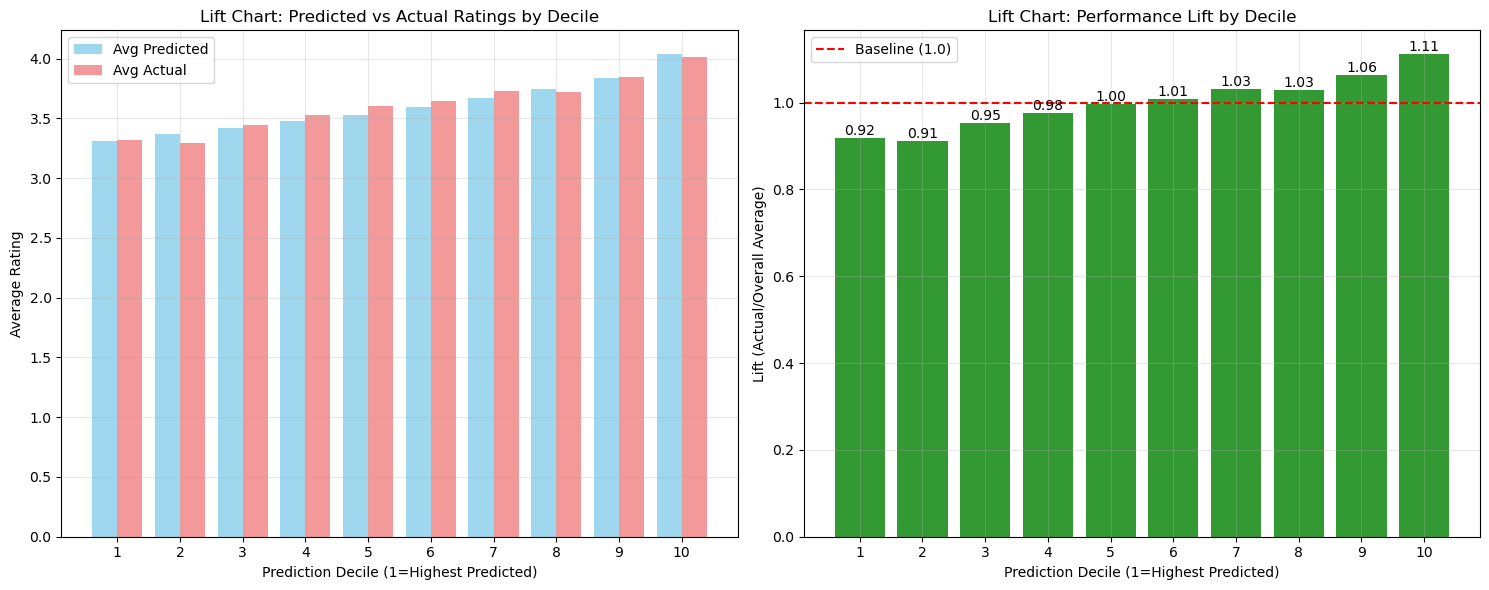


Lift Chart Summary:
   bin  count  avg_predicted  avg_actual   lift
0    1    856          3.314       3.317  0.918
1    2    842          3.366       3.292  0.911
2    3    848          3.416       3.442  0.953
3    4    849          3.474       3.525  0.976
4    5    848          3.530       3.602  0.997
5    6    849          3.594       3.644  1.009
6    7    848          3.670       3.725  1.031
7    8    849          3.750       3.717  1.029
8    9    848          3.838       3.846  1.065
9   10    849          4.035       4.014  1.111


In [415]:
"""
Create a lift chart showing model performance across prediction deciles
        
Parameters:
-----------
n_bins : int
    Number of bins/deciles for the lift chart (default: 10)
save_path : str, optional
    Path to save the plot
show_plot : bool
    Whether to display the plot
"""
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

n_bins = 10
save_path = None
show_show = True

# Use your current predictions and actuals variables
if 'predictions' not in locals() or 'actuals' not in locals():
    raise ValueError("No predictions or actuals found. Make sure you have run the prediction code first.")

# Create a temporary dataframe for binning and clean the data
df_temp = pd.DataFrame({
    'predicted': predictions,
    'actual': actuals
})

# Check for and remove NaN values
print(f"Original data shape: {df_temp.shape}")
print(f"NaN values in predictions: {df_temp['predicted'].isna().sum()}")
print(f"NaN values in actuals: {df_temp['actual'].isna().sum()}")

# Debug: Check the data ranges
print(f"Predictions range: {df_temp['predicted'].min()} to {df_temp['predicted'].max()}")
print(f"Actuals range: {df_temp['actual'].min()} to {df_temp['actual'].max()}")
print(f"Unique prediction values: {df_temp['predicted'].nunique()}")

# Remove rows with NaN values
df_temp = df_temp.dropna()
print(f"Data shape after removing NaN: {df_temp.shape}")

# Check if we have enough data
if len(df_temp) == 0:
    raise ValueError("No valid data after removing NaN values")

if len(df_temp) < n_bins:
    print(f"Warning: Only {len(df_temp)} data points available, reducing bins to {len(df_temp)}")
    n_bins = min(n_bins, len(df_temp))

# Sort by predicted values and create bins
df_temp = df_temp.sort_values('predicted', ascending=False)

# Debug: Check if predictions have enough variation for binning
unique_predictions = df_temp['predicted'].nunique()
print(f"Number of unique prediction values: {unique_predictions}")

if unique_predictions < n_bins:
    print(f"Warning: Only {unique_predictions} unique predictions, reducing bins to {unique_predictions}")
    n_bins = unique_predictions

try:
    print(f"Attempting to create {n_bins} bins...")
    df_temp['bin'] = pd.qcut(df_temp['predicted'], q=n_bins, labels=False, duplicates='drop')
    print("qcut successful")
except Exception as e:
    print(f"qcut failed: {e}")
    try:
        print("Trying pd.cut instead...")
        df_temp['bin'] = pd.cut(df_temp['predicted'], bins=n_bins, labels=False, duplicates='drop')
        print("cut successful")
    except Exception as e2:
        print(f"cut also failed: {e2}")
        # Manual binning as last resort
        print("Using manual binning...")
        df_temp = df_temp.reset_index(drop=True)
        bin_size = len(df_temp) // n_bins
        df_temp['bin'] = df_temp.index // bin_size
        # Ensure the last bin doesn't exceed n_bins-1
        df_temp.loc[df_temp['bin'] >= n_bins, 'bin'] = n_bins - 1

# Check bins created
print(f"Bins created: {df_temp['bin'].unique()}")
print(f"Bin value counts:")
print(df_temp['bin'].value_counts().sort_index())

# Remove any remaining NaN bins
df_temp = df_temp.dropna(subset=['bin'])
print(f"Data shape after removing NaN bins: {df_temp.shape}")

# Calculate lift metrics for each bin
lift_data = []
for bin_num in sorted(df_temp['bin'].unique()):
    bin_data = df_temp[df_temp['bin'] == bin_num]
    
    lift_metrics = {
        'bin': int(bin_num + 1),  # Start from 1 instead of 0
        'count': len(bin_data),
        'avg_predicted': bin_data['predicted'].mean(),
        'avg_actual': bin_data['actual'].mean(),
        'min_predicted': bin_data['predicted'].min(),
        'max_predicted': bin_data['predicted'].max()
    }
    lift_data.append(lift_metrics)

lift_df = pd.DataFrame(lift_data)
print(f"Lift dataframe shape: {lift_df.shape}")
print("Lift dataframe:")
print(lift_df)

# Check if we have valid data for plotting
if len(lift_df) == 0:
    raise ValueError("No valid bins created for lift chart")

# Rest of your plotting code...
# Create the lift chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Average Predicted vs Actual by Decile
x_pos = lift_df['bin']
ax1.bar(x_pos - 0.2, lift_df['avg_predicted'], width=0.4, 
        label='Avg Predicted', alpha=0.8, color='skyblue')
ax1.bar(x_pos + 0.2, lift_df['avg_actual'], width=0.4, 
        label='Avg Actual', alpha=0.8, color='lightcoral')

ax1.set_xlabel('Prediction Decile (1=Highest Predicted)')
ax1.set_ylabel('Average Rating')
ax1.set_title('Lift Chart: Predicted vs Actual Ratings by Decile')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xticks(x_pos)

# Plot 2: Lift (Actual/Overall Average)
overall_avg = df_temp['actual'].mean()
lift_df['lift'] = lift_df['avg_actual'] / overall_avg

bars = ax2.bar(x_pos, lift_df['lift'], alpha=0.8, color='green')
ax2.axhline(y=1.0, color='red', linestyle='--', label='Baseline (1.0)')
ax2.set_xlabel('Prediction Decile (1=Highest Predicted)')
ax2.set_ylabel('Lift (Actual/Overall Average)')
ax2.set_title('Lift Chart: Performance Lift by Decile')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xticks(x_pos)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    if not np.isnan(height):  # Only add label if height is not NaN
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()

if save_path:
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
if show_plot:
    plt.show()
else:
    plt.close()

# Print summary statistics
print("\nLift Chart Summary:")
print(lift_df[['bin', 'count', 'avg_predicted', 'avg_actual', 'lift']].round(3))


In [416]:
# Check if your features have variation
if hasattr(x_test, 'toarray'):
    # If it's a sparse matrix
    x_test_dense = x_test.toarray()
else:
    x_test_dense = x_test

print("X_test statistics:")
print(pd.DataFrame(x_test_dense).describe())

X_test statistics:
                 0            1            2            3            4  \
count  8486.000000  8486.000000  8486.000000  8486.000000  8486.000000   
mean      0.298975     0.259360     0.184172     0.347754     0.353382   
std       0.333302     0.278720     0.342766     0.344028     0.322764   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.020841     0.030552   
50%       0.152285     0.177909     0.000000     0.233527     0.287195   
75%       0.576753     0.417977     0.136131     0.633332     0.606846   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                 5  
count  8486.000000  
mean     -0.007601  
std       0.870006  
min      -0.485387  
25%      -0.418362  
50%      -0.279842  
75%       0.050817  
max      16.860821  


In [417]:
# 2. Check model weights
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    if weights:
        print(f"Layer {i} weights shape: {[w.shape for w in weights]}")
        print(f"Layer {i} weight range: {np.min(weights[0]):.6f} to {np.max(weights[0]):.6f}")

Layer 0 weights shape: [(6, 128), (128,)]
Layer 0 weight range: -0.313240 to 0.277703
Layer 1 weights shape: [(128, 1), (1,)]
Layer 1 weight range: -0.261105 to 0.422893


In [418]:
# 3. Check predictions on training data
train_predictions = model.predict(x_train).flatten()
print(f"Training predictions range: {train_predictions.min()} to {train_predictions.max()}")
print(f"Unique training predictions: {np.unique(train_predictions).shape[0]}")

796/796 ━━━━━━━━━━━━━━━━━━━━ 1s 891us/step
Training predictions range: 3.159984588623047 to 4.209059238433838
Unique training predictions: 21753


In [419]:
print("\n" + "="*50)
print("ALL TESTS COMPLETED SUCCESSFULLY!")
print("="*50)


ALL TESTS COMPLETED SUCCESSFULLY!
